In [13]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from basenji import dataset, dataset_float32
from utils.call_peaks import call_peaks

### Histograms of peak in number of cell types for each dataset
1. Enformer 
2. Sei
3. Loeb et al.
4. Calderon et al.

In [14]:
root_dir = "/clusterfs/nilah/pooja"
fig_dir = f"{root_dir}/CellTypeSpecificAccessibilityPrediction/figures/fig1"

1. Enformer

In [8]:
data_dir = "/clusterfs/nilah/richard/basenji2/data_pretrained_basenji2/human"
human_targets = pd.read_csv(f"{data_dir}/targets.txt", sep="\t", index_col=0)
dnase_atac_targets = np.where([("DNASE" in i) or ("ATAC" in i) for i in human_targets["description"]])[0]

eval_data = dataset.SeqDataset(data_dir,
    split_label="test",
    batch_size=4,
    mode='eval',
    tfr_pattern=None)

targets = eval_data.numpy(return_inputs=False, return_outputs=True)
ds_indexes = np.arange(0, targets.shape[1], 8)
test_targets_dnase = targets[:, ds_indexes, :]
test_targets_dnase = test_targets_dnase[:, :, dnase_atac_targets].reshape(-1,len(dnase_atac_targets))
peak_in_num_cell_types = call_peaks(test_targets_dnase)

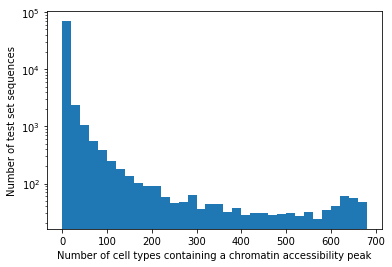

In [10]:
plt.hist(peak_in_num_cell_types[np.where(peak_in_num_cell_types >= 1)[0]], 
         bins=np.arange(0, 700, 20), log=True)
plt.xlabel("Number of cell types containing a chromatin accessibility peak")
plt.ylabel("Number of test set sequences")
plt.savefig(f"{fig_dir}/enformer_peak_distribution.pdf", dpi=300)

2. Sei

In [14]:
data_dir = "/global/scratch/users/poojakathail/sei"
sei_profiles = np.load(f'{data_dir}/sei-framework/resources/sei_profiles.npy')
sei_profiles = np.array([i.split("|")[1].strip() for i in sei_profiles])
dnase_atac_targets = np.union1d(np.where(sei_profiles == "DNase")[0],
                                np.where(sei_profiles == "ATAC-seq")[0])

test_predictions = h5py.File(f'{data_dir}/performance_curves/sei_data/test_predictions.h5','r')
targets = test_predictions['targets'].value
targets = targets[:, dnase_atac_targets]
peak_in_num_cell_types = targets.sum(axis=1)

/global/software/sl-7.x86_64/modules/langs/python/3.7/lib/python3.7/site-packages/IPython/kernel/__main__.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


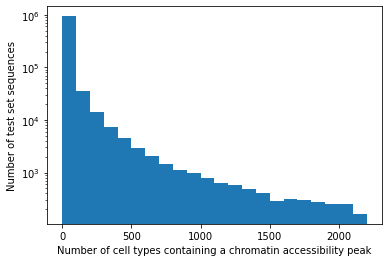

In [16]:
plt.hist(peak_in_num_cell_types[np.where(peak_in_num_cell_types >= 1)[0]], 
         bins=np.arange(0, 2300, 100), log=True)
plt.xlabel("Number of cell types containing a chromatin accessibility peak")
plt.ylabel("Number of test set sequences")
plt.savefig(f"{fig_dir}/sei_peak_distribution.pdf", dpi=300)

3. Loeb et al

In [5]:
data_dir = f"{root_dir}/kidney_data/kidney_sc_data_processed_bigwigs_holdout_chrs"

eval_data = dataset.SeqDataset(data_dir,
    split_label="test",
    batch_size=4,
    mode='eval',
    tfr_pattern=None)

targets = eval_data.numpy(return_inputs=False, return_outputs=True)
targets = targets[:, 0, :]
peak_in_num_cell_types = call_peaks(targets)

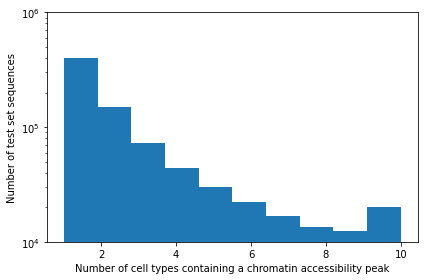

In [10]:
plt.hist(peak_in_num_cell_types[np.where(peak_in_num_cell_types >= 1)[0]], log=True)
plt.xlabel("Number of cell types containing a chromatin accessibility peak")
plt.ylabel("Number of test set sequences")
plt.ylim(10**4, 10**6)
plt.tight_layout()
plt.savefig(f"{fig_dir}/loeb_et_al_peak_distribution.pdf", dpi=300)

4. Calderon et al

In [15]:
data_dir = f"{root_dir}/immune_atlas/all_sequences_processed_float32"

eval_data = dataset_float32.SeqDataset(data_dir,
    split_label="test",
    batch_size=4,
    mode='eval',
    tfr_pattern=None)

targets = eval_data.numpy(return_inputs=False, return_outputs=True)
targets = targets[:, 0, :]
peak_in_num_cell_types = call_peaks(targets)

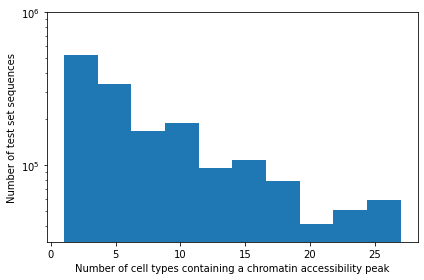

In [21]:
plt.hist(peak_in_num_cell_types[np.where(peak_in_num_cell_types >= 1)[0]], log=True)
plt.xlabel("Number of cell types containing a chromatin accessibility peak")
plt.ylabel("Number of test set sequences")
plt.ylim(10**4.5, 10**6)
plt.tight_layout()
plt.savefig(f"{fig_dir}/calderon_et_al_peak_distribution_2.pdf", dpi=300)